In [23]:
import matplotlib.pyplot as plt

In [1]:
import skimage

In [2]:
dir(skimage)

['_INPLACE_MSG',
 '_STANDARD_MSG',
 '__SKIMAGE_SETUP__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_raise_build_error',
 '_shared',
 'data',
 'data_dir',
 'dtype_limits',
 'ensure_python_version',
 'img_as_bool',
 'img_as_float',
 'img_as_float32',
 'img_as_float64',
 'img_as_int',
 'img_as_ubyte',
 'img_as_uint',
 'lookfor',
 'util']

In [3]:
import imageio

In [4]:
dir(imageio)

['RETURN_BYTES',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'core',
 'formats',
 'get_reader',
 'get_writer',
 'help',
 'imread',
 'imsave',
 'imwrite',
 'mimread',
 'mimsave',
 'mimwrite',
 'mvolread',
 'mvolsave',
 'mvolwrite',
 'plugins',
 'read',
 'save',
 'show_formats',
 'volread',
 'volsave',
 'volwrite']

In [8]:
skimage.lookfor("contour")

Search results for 'contour'
----------------------------
skimage.measure.find_contours
    Find iso-valued contours in a 2D array for a given level value.
skimage.segmentation.active_contour
    Active contour model.
skimage.segmentation.chan_vese
    Chan-Vese segmentation algorithm.
skimage.segmentation.morphological_chan_vese
    Morphological Active Contours without Edges (MorphACWE)
skimage.segmentation.morphological_geodesic_active_contour
    Morphological Geodesic Active Contours (MorphGAC).
skimage.measure.perimeter
    Calculate total perimeter of all objects in binary image.
skimage.measure.regionprops
    Measure properties of labeled image regions.
skimage.measure.marching_cubes_classic
    Classic marching cubes algorithm to find surfaces in 3d volumetric data.
skimage.measure.marching_cubes_lewiner
    Lewiner marching cubes algorithm to find surfaces in 3d volumetric data.
skimage.segmentation.inverse_gaussian_gradient
    Inverse of gradient magnitude.

In [9]:
# numpy 기반으로 만들었기 때문에 info를 쓸 수 있다.

import numpy as np
np.info(skimage.measure.find_contours)

 find_contours(array, level, fully_connected='low',
               positive_orientation='low')

Find iso-valued contours in a 2D array for a given level value.

Uses the "marching squares" method to compute a the iso-valued contours of
the input 2D array for a particular level value. Array values are linearly
interpolated to provide better precision for the output contours.

Parameters
----------
array : 2D ndarray of double
    Input data in which to find contours.
level : float
    Value along which to find contours in the array.
fully_connected : str, {'low', 'high'}
     Indicates whether array elements below the given level value are to be
     considered fully-connected (and hence elements above the value will
     only be face connected), or vice-versa. (See notes below for details.)
positive_orientation : either 'low' or 'high'
     Indicates whether the output contours will produce positively-oriented
     polygons around islands of low- or high-valued elements. If 'low' then


In [10]:
from skimage import io

In [16]:
img = io.imread("practice/1.jpg")

In [17]:
img.shape

(620, 620, 3)

In [54]:
img2 = io.imread("practice/cat.png")

In [55]:
img2.shape

(771, 926, 4)

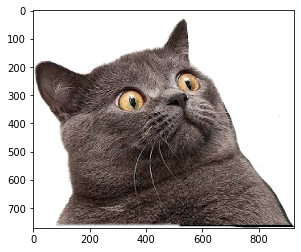

In [56]:
plt.imshow(img2)

> - 투명도가 있는 png파일은 채널이 4개이다.

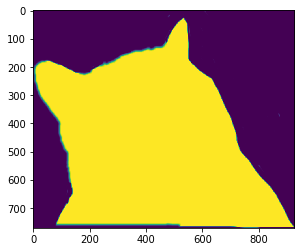

In [28]:
plt.imshow(img2[:,:,3])

> - 4번째 채널이 투명 채널이구나!
- matplotlib은 투명 색을 지원하지 않는다.

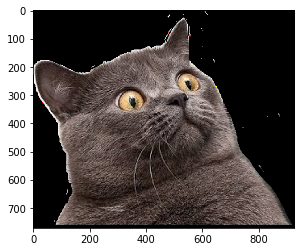

In [49]:
plt.imshow(img2[:,:,:3])

> 투명을 제외한 이미지

#### 잠시 openCV에서 투명 이미지를 3채널로 불러오는 기능을 복습해보자

In [30]:
import cv2
import imutils

In [33]:
imutils.find_function("IMREAD")

1. IMREAD_ANYCOLOR
2. IMREAD_ANYDEPTH
3. IMREAD_COLOR
4. IMREAD_GRAYSCALE
5. IMREAD_IGNORE_ORIENTATION
6. IMREAD_LOAD_GDAL
7. IMREAD_REDUCED_COLOR_2
8. IMREAD_REDUCED_COLOR_4
9. IMREAD_REDUCED_COLOR_8
10. IMREAD_REDUCED_GRAYSCALE_2
11. IMREAD_REDUCED_GRAYSCALE_4
12. IMREAD_REDUCED_GRAYSCALE_8
13. IMREAD_UNCHANGED
14. imread
15. imreadmulti


In [40]:
[(_, getattr(cv2,_)) for _ in dir(cv2) if _.startswith("IMREAD_")]

[('IMREAD_ANYCOLOR', 4),
 ('IMREAD_ANYDEPTH', 2),
 ('IMREAD_COLOR', 1),
 ('IMREAD_GRAYSCALE', 0),
 ('IMREAD_IGNORE_ORIENTATION', 128),
 ('IMREAD_LOAD_GDAL', 8),
 ('IMREAD_REDUCED_COLOR_2', 17),
 ('IMREAD_REDUCED_COLOR_4', 33),
 ('IMREAD_REDUCED_COLOR_8', 65),
 ('IMREAD_REDUCED_GRAYSCALE_2', 16),
 ('IMREAD_REDUCED_GRAYSCALE_4', 32),
 ('IMREAD_REDUCED_GRAYSCALE_8', 64),
 ('IMREAD_UNCHANGED', -1)]

In [34]:
img3 = cv2.imread("practice/cat.png", cv2.IMREAD_COLOR)
img3.shape

(771, 926, 3)

> - `IMREAD_COLOR`는 투명 이미지를 투명 채널 제외하고 불러온다.
- `IMREAD_ANYCOLOR`도 투명 이미지를 투명 채널 제외하고 불러온다.

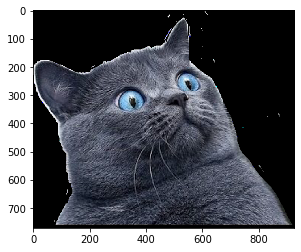

In [37]:
plt.imshow(cv2.imread("practice/cat.png", 1))

> - 이미지 띄워보기

#### 다시 skimage

In [50]:
from skimage import data, data_dir

In [51]:
data_dir

'C:\\Users\\JINHYO\\Anaconda3\\lib\\site-packages\\skimage\\data'

> - 연습용 데이터가 있는 곳이 data_dir이다.

In [52]:
data.astronaut()

array([[[154, 147, 151],
        [109, 103, 124],
        [ 63,  58, 102],
        ..., 
        [127, 120, 115],
        [120, 117, 106],
        [125, 119, 110]],

       [[177, 171, 171],
        [144, 141, 143],
        [113, 114, 124],
        ..., 
        [127, 118, 112],
        [124, 115, 108],
        [121, 116, 105]],

       [[201, 194, 193],
        [182, 178, 175],
        [168, 165, 164],
        ..., 
        [128, 120, 117],
        [126, 116, 112],
        [124, 114, 109]],

       ..., 
       [[186, 170, 176],
        [186, 170, 177],
        [183, 168, 170],
        ..., 
        [  0,   0,   0],
        [  0,   0,   1],
        [  0,   0,   0]],

       [[183, 169, 170],
        [182, 167, 171],
        [185, 164, 176],
        ..., 
        [  0,   0,   1],
        [  1,   1,   1],
        [  0,   0,   0]],

       [[184, 167, 172],
        [183, 165, 169],
        [180, 162, 171],
        ..., 
        [  0,   0,   0],
        [  1,   1,   1],
        [  0,   0,

In [53]:
dir(data)

['__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_binary_blobs',
 '_detect',
 '_load',
 '_np',
 '_os',
 'astronaut',
 'binary_blobs',
 'brick',
 'camera',
 'cell',
 'checkerboard',
 'chelsea',
 'clock',
 'coffee',
 'coins',
 'colorwheel',
 'data_dir',
 'grass',
 'gravel',
 'horse',
 'hubble_deep_field',
 'img_as_bool',
 'immunohistochemistry',
 'lbp_frontal_face_cascade_filename',
 'lfw_subset',
 'load',
 'logo',
 'microaneurysms',
 'moon',
 'osp',
 'page',
 'retina',
 'rocket',
 'rough_wall',
 'shepp_logan_phantom',
 'stereo_motorcycle',
 'tests',
 'text',
 'warn']

> - data에 연습용 데이터들이 있다.
- 연습용 데이터의 원본은 `data_dir`에 있다.

skimage는 갤러리에서 마음에 드는 기능 가져다 쓰면서 공부하면 된다.: https://scikit-image.org/docs/stable/auto_example